<a href="https://colab.research.google.com/github/addy4/fuzzy-logic/blob/main/HeatExchangerFuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook demonstrates a fuzzy system for for the heat exhanger problem. It 

*   List item
*   List item

simulates a fuzzy inference engine that has the following variables and rule base

> *Input Variables*
*   Heat Flow Rate
*   Temperature Approach

> *Output Variables*
*   Heat Exchanger Capacity

> *Disjunctive Set of Rules*
*   If **w** (flow rate) is **large** and **ΔTapp** (temperature approach) is **small**, then **AU** is a **large** heat exchanger
*   If **w** (flow rate) is **small** or **ΔTapp** (temperature approach) is **large**, then **AU** is a **small** heat exchanger
*   If **w** (flow rate) is **small** and **ΔTapp** (temperature approach) is **small**, then **AU** is a **large** heat exchanger


> Input Paramaters
*   **w** = 1300 kg/s
*   **ΔTapp** = 6.5K

> How is the solution implemented (methodology) ?

*   Min-Max Mamdani Implication
*   Centroid Method for Defuzzification
























In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [ ]:
flowRate = ctrl.Antecedent(np.arange(1000,2100,100), 'FlowRate')
tempApproach = ctrl.Antecedent(np.arange(0,15.5,0.5), 'TemperatureApproach')
heatExchanger = ctrl.Consequent(np.arange(0,20000,500), 'HeatExchanger')

In [ ]:
flowRate['low'] = fuzz.trimf(flowRate.universe, [1000, 1200, 1400])
flowRate['high'] = fuzz.trimf(flowRate.universe, [1200, 1500, 1800])
tempApproach['low'] = fuzz.trimf(tempApproach.universe, [2.5, 5, 7.5])
tempApproach['high'] = fuzz.trimf(tempApproach.universe, [6, 10, 14])
heatExchanger['low'] = fuzz.trimf(heatExchanger.universe, [2000, 5000, 8000])
heatExchanger['high'] = fuzz.trimf(heatExchanger.universe, [6000, 10000, 14000])

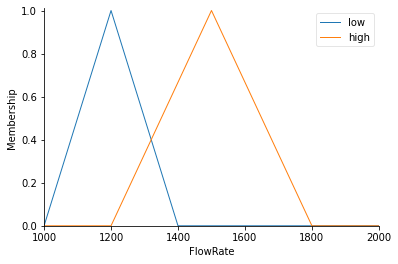

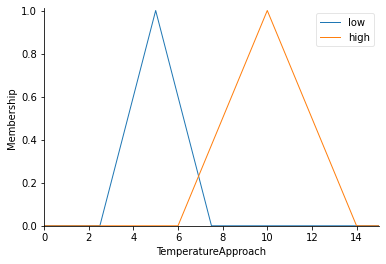

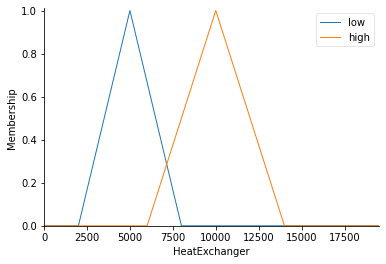

In [ ]:
flowRate.view()
tempApproach.view()
heatExchanger.view()

In [ ]:
rule1 = ctrl.Rule(flowRate['high'] & tempApproach['low'], heatExchanger['high'])
rule2 = ctrl.Rule(flowRate['low'] | tempApproach['high'], heatExchanger['low'])
rule3 = ctrl.Rule(flowRate['low'] & tempApproach['low'], heatExchanger['high'])

In [ ]:
heat_exchange_fuzzy_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
heatExchangerSimulation = ctrl.ControlSystemSimulation(heat_exchange_fuzzy_ctrl)

In [ ]:
heatExchangerSimulation.input['FlowRate'] = 1300
heatExchangerSimulation.input['TemperatureApproach'] = 6.5

In [ ]:
heatExchangerSimulation.compute()

7698.274279419866


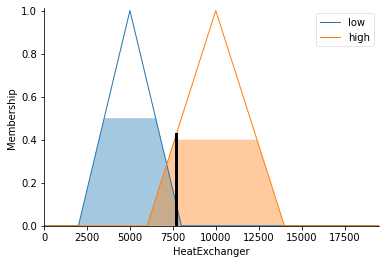

In [ ]:
from skfuzzy.defuzzify.defuzz import centroid
print(heatExchangerSimulation.output['HeatExchanger'])

heatExchanger.view(sim=heatExchangerSimulation)